In [24]:
# 04_hierarchical_demo.ipynb (Python Code exportiert als Skript zur Vorlage)

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from planners.visibility_prm import VisibilityPRM
from planners.hierarchical_planner import HierarchicalPlanner
from planners.lazy_prm import LazyPRM
from planners.basic_prm import BasicPRM
from utils.visibility_prm_visualize import visibility_prm_visualize
from utils.hierarchical_visualize import visualize_hierarchical_planning
from utils.collision_checker import CollisionChecker
from environment import get_all_scenes
import time
import pandas as pd
from scipy.spatial.distance import euclidean

In [41]:
# ---- Konfiguration für den globalen Planer (VisibilityPRM) ----
config_high = {
    "ntry": 100
}

config_low_lazy = {
    "initialRoadmapSize": 30,
    "updateRoadmapSize": 20,
    "kNearest": 8,
    "maxIterations": 10
}

config_low_basic = {
    "numNodes": 50,
    "radius": 4
}


🔁 Starte Benchmarks mit Subplanner: Lazy

🔍 Szene: U-Shape
Globaler Pfad: ['start', 25, 0, 15, 'goal']
Koordinaten des globalen Pfads: [[2.0, 20.0], array([ 0.55474667, 18.17419944]), array([6.83640048, 1.71539741]), array([19.91207791,  4.11720825]), [20.0, 2.0]]
Segment 0: [2.0, 20.0] → [ 0.55474667 18.17419944]
→ Lokaler Planner für Segment 0: [2.0, 20.0] → [ 0.55474667 18.17419944]
   Lokale Begrenzung (geclipped): ((0, np.float64(3.6059576409777425)), (np.float64(16.75851541351397), np.float64(21.41568402755339)))
Segment 1: [ 0.55474667 18.17419944] → [6.83640048 1.71539741]
→ Lokaler Planner für Segment 1: [ 0.55474667 18.17419944] → [6.83640048 1.71539741]
   Lokale Begrenzung (geclipped): ((0, np.float64(11.695573573297708)), (np.float64(1.9447984273159378), np.float64(17.944798427315938)))
Segment 2: [6.83640048 1.71539741] → [19.91207791  4.11720825]
→ Lokaler Planner für Segment 2: [6.83640048 1.71539741] → [19.91207791  4.11720825]
   Lokale Begrenzung (geclipped): ((np.f

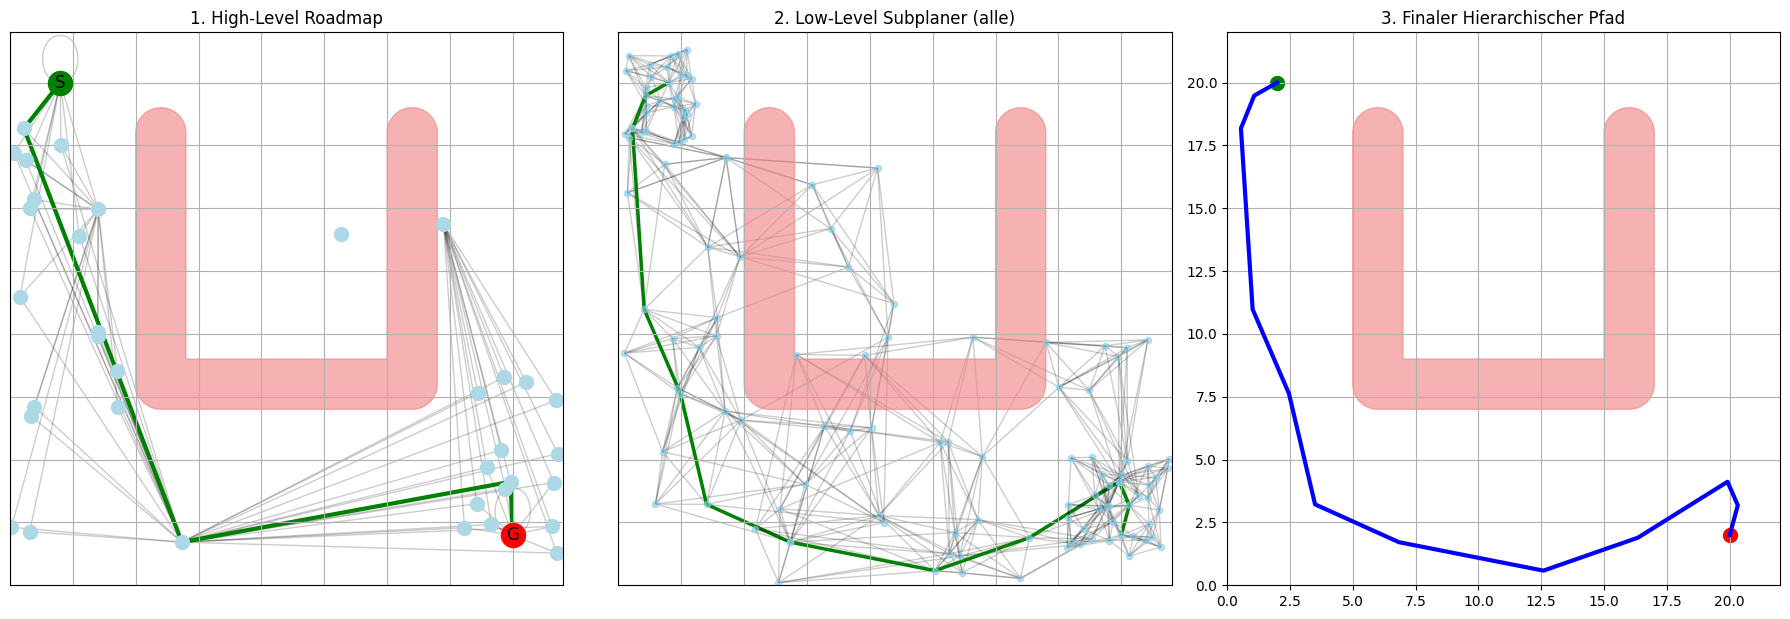


🔍 Szene: L-Shape
Globaler Pfad: ['start', 145, 4, 64, 54, 122, 'goal']
Koordinaten des globalen Pfads: [[2.0, 2.0], array([3.25329524, 2.13216875]), array([11.49160615,  3.19444698]), array([21.42615882,  7.60399781]), array([20.56801651, 12.59083057]), array([15.24989878, 14.33774059]), [15.0, 15.0]]
Segment 0: [2.0, 2.0] → [3.25329524 2.13216875]
→ Lokaler Planner für Segment 0: [2.0, 2.0] → [3.25329524 2.13216875]
   Lokale Begrenzung (geclipped): ((np.float64(1.3664025908129247), np.float64(3.886892646255622)), (np.float64(0.8058393475834058), np.float64(3.326329403026103)))
Segment 1: [3.25329524 2.13216875] → [11.49160615  3.19444698]
→ Lokaler Planner für Segment 1: [3.25329524 2.13216875] → [11.49160615  3.19444698]
   Lokale Begrenzung (geclipped): ((0, np.float64(15.37245069401536)), (0, np.float64(10.663307864444038)))
Segment 2: [11.49160615  3.19444698] → [21.42615882  7.60399781]
→ Lokaler Planner für Segment 2: [11.49160615  3.19444698] → [21.42615882  7.60399781]
   Lo

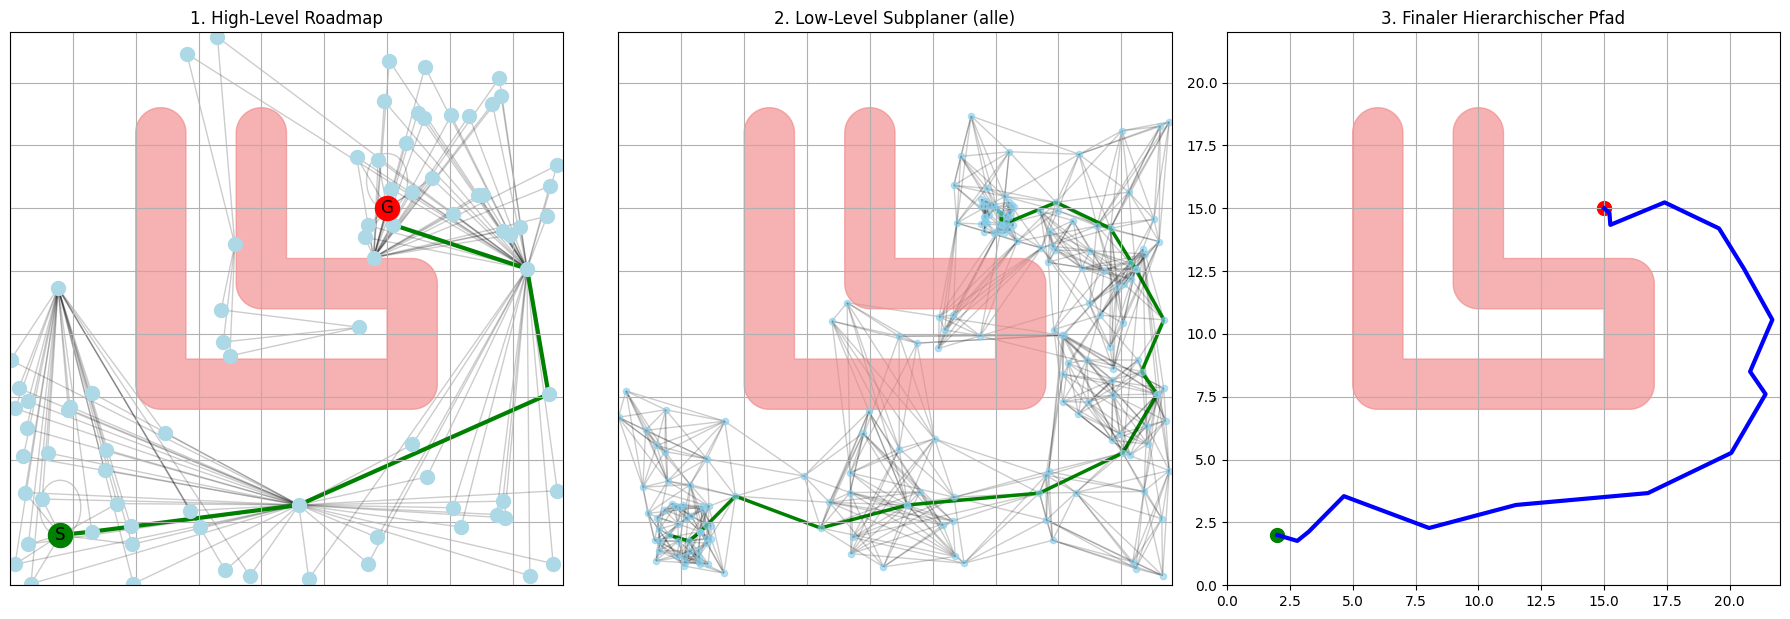


🔍 Szene: Cross-Shape
Globaler Pfad: ['start', 53, 1, 27, 4, 'goal']
Koordinaten des globalen Pfads: [[10, 10.0], array([13.88113542,  4.29551547]), array([17.18979335,  7.77471942]), array([17.73980896, 21.72004511]), array([ 8.81771682, 13.32281541]), [12.5, 15.0]]
Segment 0: [10, 10.0] → [13.88113542  4.29551547]
→ Lokaler Planner für Segment 0: [10, 10.0] → [13.88113542  4.29551547]
   Lokale Begrenzung (geclipped): ((np.float64(5.040976717016403), np.float64(18.840158698155435)), (np.float64(0.24816674560335006), np.float64(14.047348726742381)))
Segment 1: [13.88113542  4.29551547] → [17.18979335  7.77471942]
→ Lokaler Planner für Segment 1: [13.88113542  4.29551547] → [17.18979335  7.77471942]
   Lokale Begrenzung (geclipped): ((np.float64(10.73420648438944), np.float64(20.336722276236582)), (np.float64(1.2338595483936334), np.float64(10.836375340240778)))
Segment 2: [17.18979335  7.77471942] → [17.73980896 21.72004511]
→ Lokaler Planner für Segment 2: [17.18979335  7.77471942] →

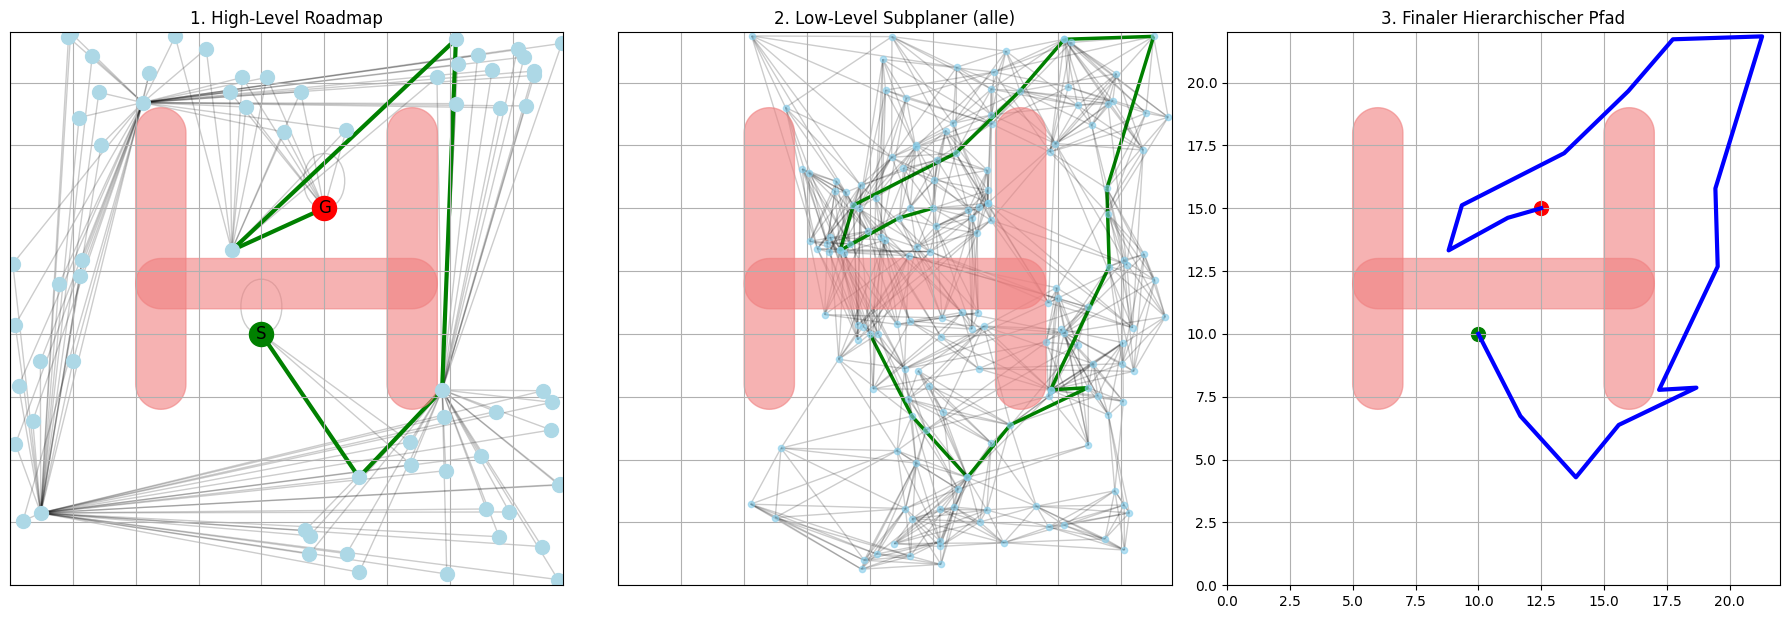


🔍 Szene: Corridor
Kein Pfad im Sichtbarkeitsgraph gefunden.
❌ Kein Pfad gefunden in Szene: Corridor

🔍 Szene: Complex Shape
Globaler Pfad: ['start', 257, 142, 157, 6, 60, 0, 'goal']
Koordinaten des globalen Pfads: [[5.0, 5.0], array([4.66729345, 5.76903313]), array([4.69776502, 9.49456658]), array([ 6.19028676, 20.36394508]), array([ 1.10368546, 21.62283802]), array([19.03506179, 21.76600919]), array([16.37445155,  4.96531742]), [17.5, 5.0]]
Segment 0: [5.0, 5.0] → [4.66729345 5.76903313]
→ Lokaler Planner für Segment 0: [5.0, 5.0] → [4.66729345 5.76903313]
   Lokale Begrenzung (geclipped): ((np.float64(3.995729304953488), np.float64(5.671564142240604)), (np.float64(4.546599144779363), np.float64(6.222433982066479)))
Segment 1: [4.66729345 5.76903313] → [4.69776502 9.49456658]
→ Lokaler Planner für Segment 1: [4.66729345 5.76903313] → [4.69776502 9.49456658]
   Lokale Begrenzung (geclipped): ((np.float64(0.9568711647858885), np.float64(8.40818729869466)), (np.float64(3.90614178678853)

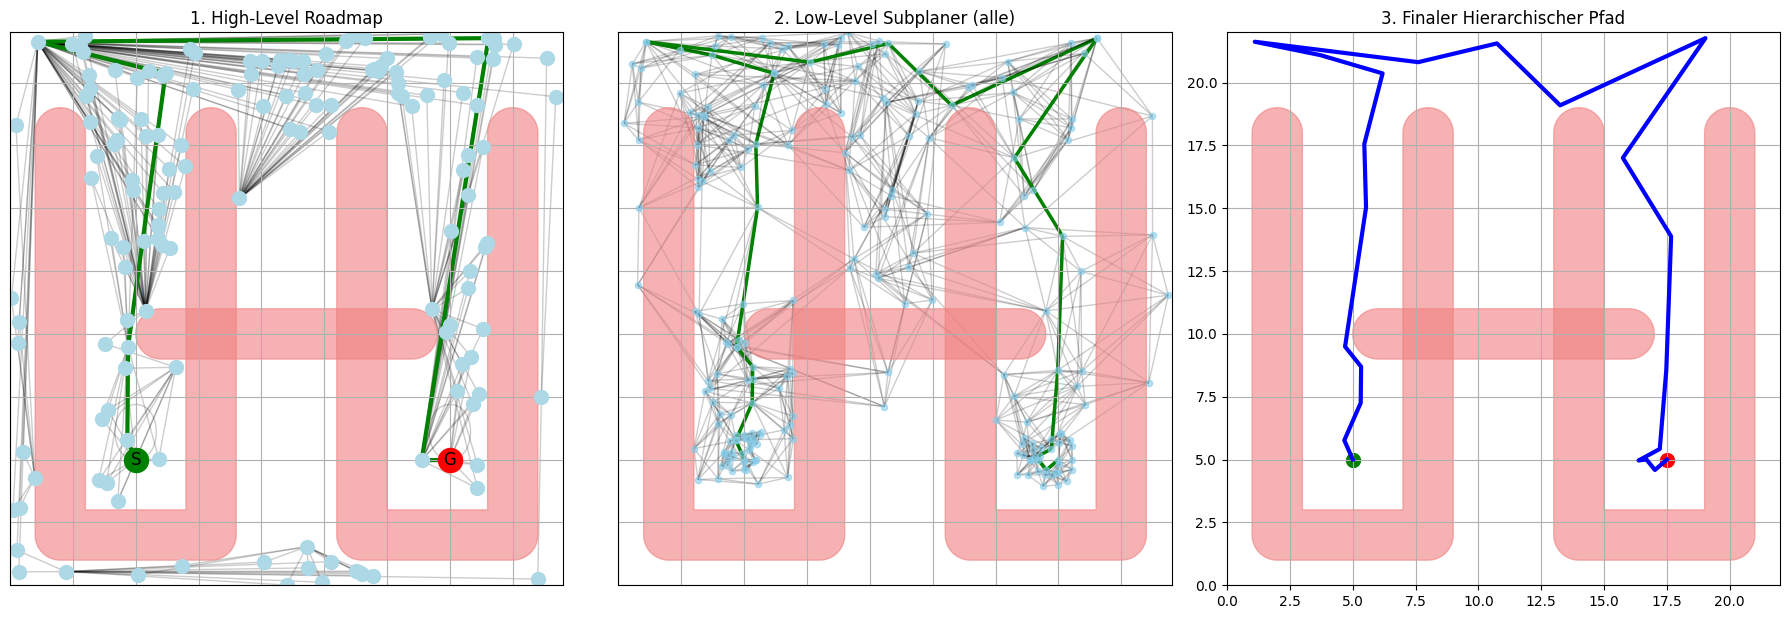


🔍 Szene: Multiple Obstacles
Globaler Pfad: ['start', 203, 0, 41, 'goal']
Koordinaten des globalen Pfads: [[1.0, 1.0], array([2.04515411, 6.38487726]), array([17.74901596, 14.03203681]), array([13.82741422,  4.00005168]), [15.0, 5.0]]
Segment 0: [1.0, 1.0] → [2.04515411 6.38487726]
→ Lokaler Planner für Segment 0: [1.0, 1.0] → [2.04515411 6.38487726]
   Lokale Begrenzung (geclipped): ((0, np.float64(7.007943978707582)), (0, np.float64(9.177805554147458)))
Segment 1: [2.04515411 6.38487726] → [17.74901596 14.03203681]
→ Lokaler Planner für Segment 1: [2.04515411 6.38487726] → [17.74901596 14.03203681]
   Lokale Begrenzung (geclipped): ((np.float64(1.897085038610605), np.float64(17.897085038610605)), (np.float64(2.2084570377150445), np.float64(18.208457037715043)))
Segment 2: [17.74901596 14.03203681] → [13.82741422  4.00005168]
→ Lokaler Planner für Segment 2: [17.74901596 14.03203681] → [13.82741422  4.00005168]
   Lokale Begrenzung (geclipped): ((np.float64(7.788215093360197), 22), (n

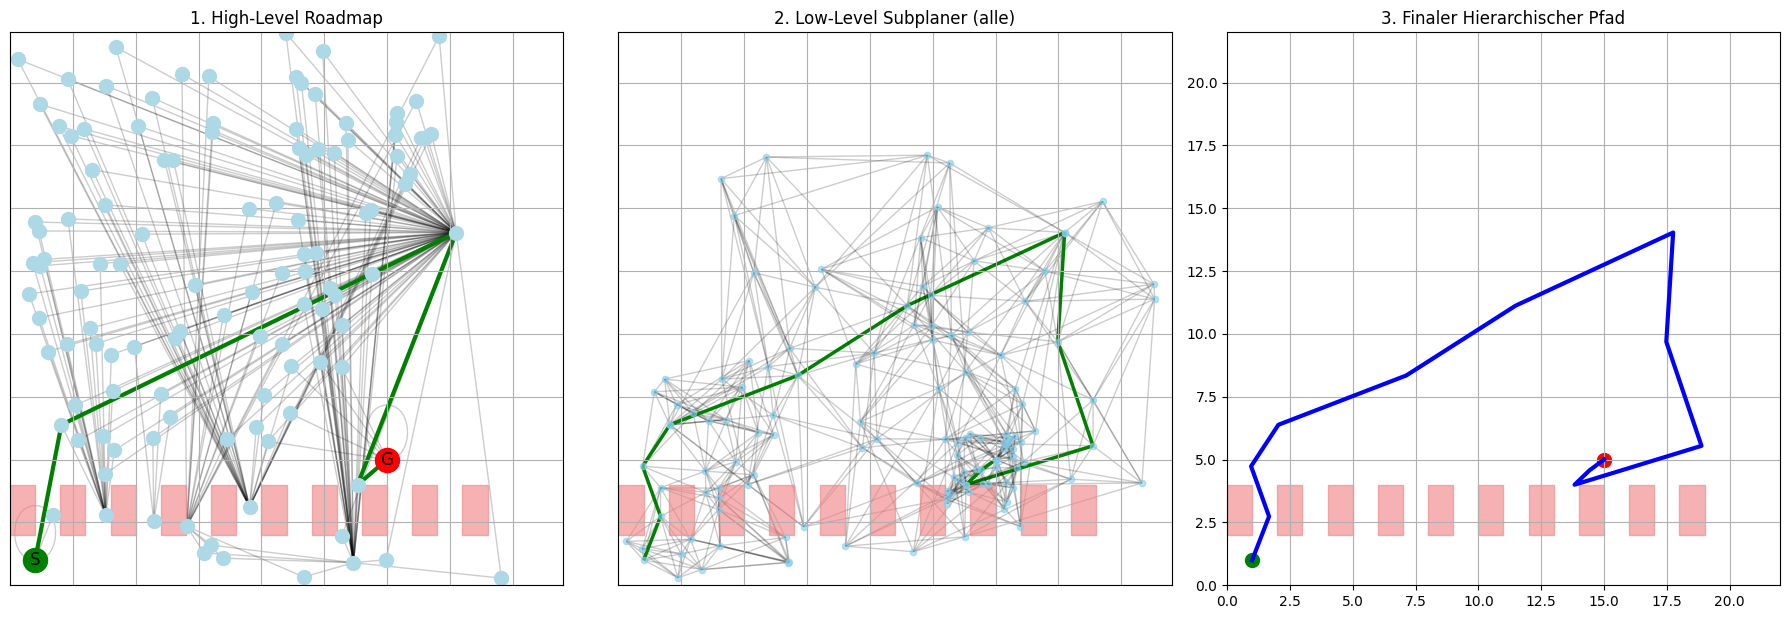


🔍 Szene: Random Obstacles
Globaler Pfad: ['start', 158, 2, 11, 'goal']
Koordinaten des globalen Pfads: [[1.0, 1.0], array([0.39307903, 0.74517608]), array([ 8.28428348, 21.08485941]), array([18.34854405, 18.28310634]), [19.0, 19.0]]
Segment 0: [1.0, 1.0] → [0.39307903 0.74517608]
→ Lokaler Planner für Segment 0: [1.0, 1.0] → [0.39307903 0.74517608]
   Lokale Begrenzung (geclipped): ((np.float64(0.038293139499023576), np.float64(1.35478589352749)), (np.float64(0.21434166053685466), np.float64(1.530834414565321)))
Segment 1: [0.39307903 0.74517608] → [ 8.28428348 21.08485941]
→ Lokaler Planner für Segment 1: [0.39307903 0.74517608] → [ 8.28428348 21.08485941]
   Lokale Begrenzung (geclipped): ((0, np.float64(12.338681256116592)), (np.float64(2.9150177440868887), np.float64(18.91501774408689)))
Segment 2: [ 8.28428348 21.08485941] → [18.34854405 18.28310634]
→ Lokaler Planner für Segment 2: [ 8.28428348 21.08485941] → [18.34854405 18.28310634]
   Lokale Begrenzung (geclipped): ((np.float

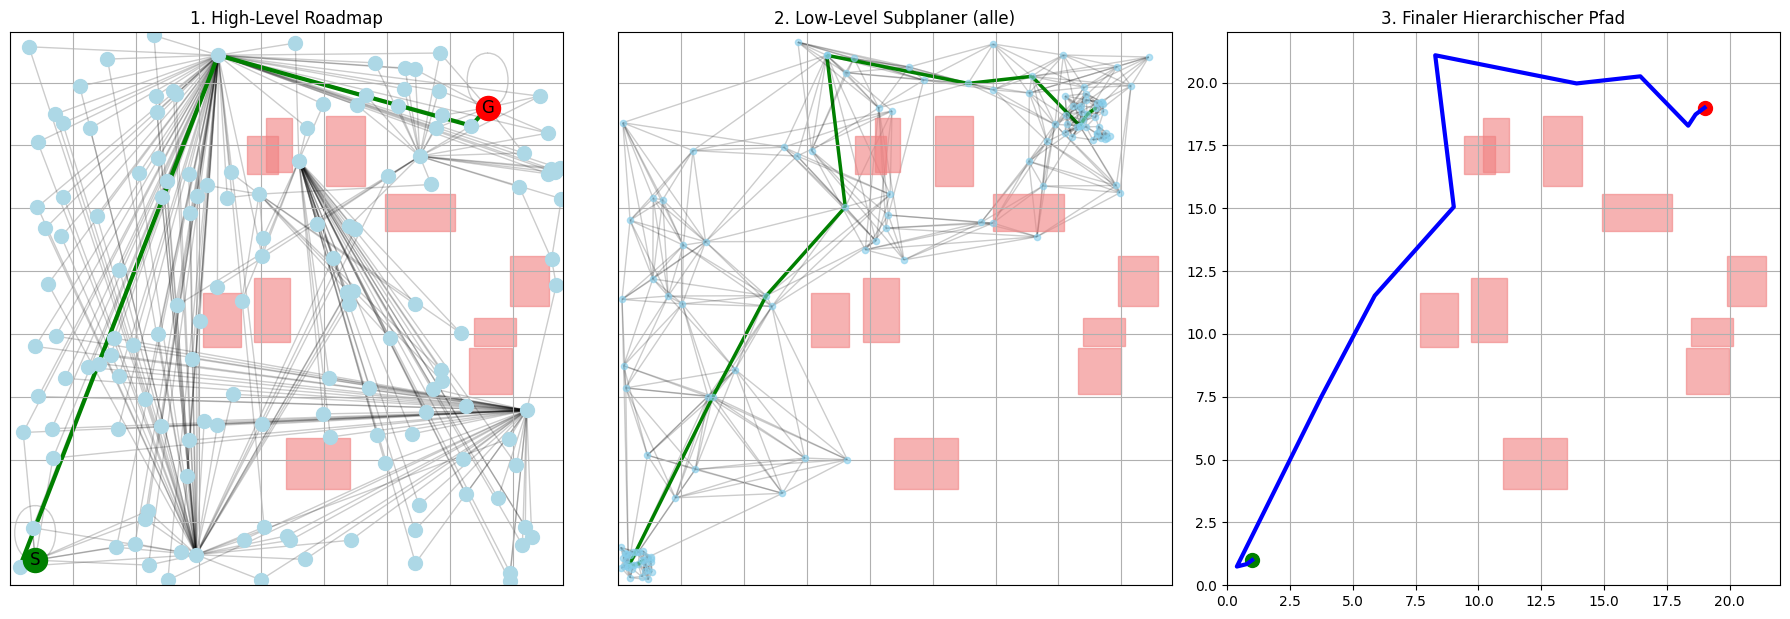


🔁 Starte Benchmarks mit Subplanner: Basic

🔍 Szene: U-Shape
Globaler Pfad: ['start', 129, 6, 19, 0, 'goal']
Koordinaten des globalen Pfads: [[2.0, 20.0], array([ 2.00489231, 19.38673111]), array([ 4.82874429, 10.80690699]), array([1.93364793, 4.76888185]), array([17.92674409,  6.22308946]), [20.0, 2.0]]
Segment 0: [2.0, 20.0] → [ 2.00489231 19.38673111]
→ Lokaler Planner für Segment 0: [2.0, 20.0] → [ 2.00489231 19.38673111]
   Lokale Begrenzung (geclipped): ((np.float64(1.389157752732249), np.float64(2.615734559411905)), (np.float64(19.08007715185944), np.float64(20.3066539585391)))
Segment 1: [ 2.00489231 19.38673111] → [ 4.82874429 10.80690699]
→ Lokaler Planner für Segment 1: [ 2.00489231 19.38673111] → [ 4.82874429 10.80690699]
   Lokale Begrenzung (geclipped): ((0, np.float64(11.416818302119914)), (np.float64(7.096819049602614), 22))
Segment 2: [ 4.82874429 10.80690699] → [1.93364793 4.76888185]
→ Lokaler Planner für Segment 2: [ 4.82874429 10.80690699] → [1.93364793 4.76888185]

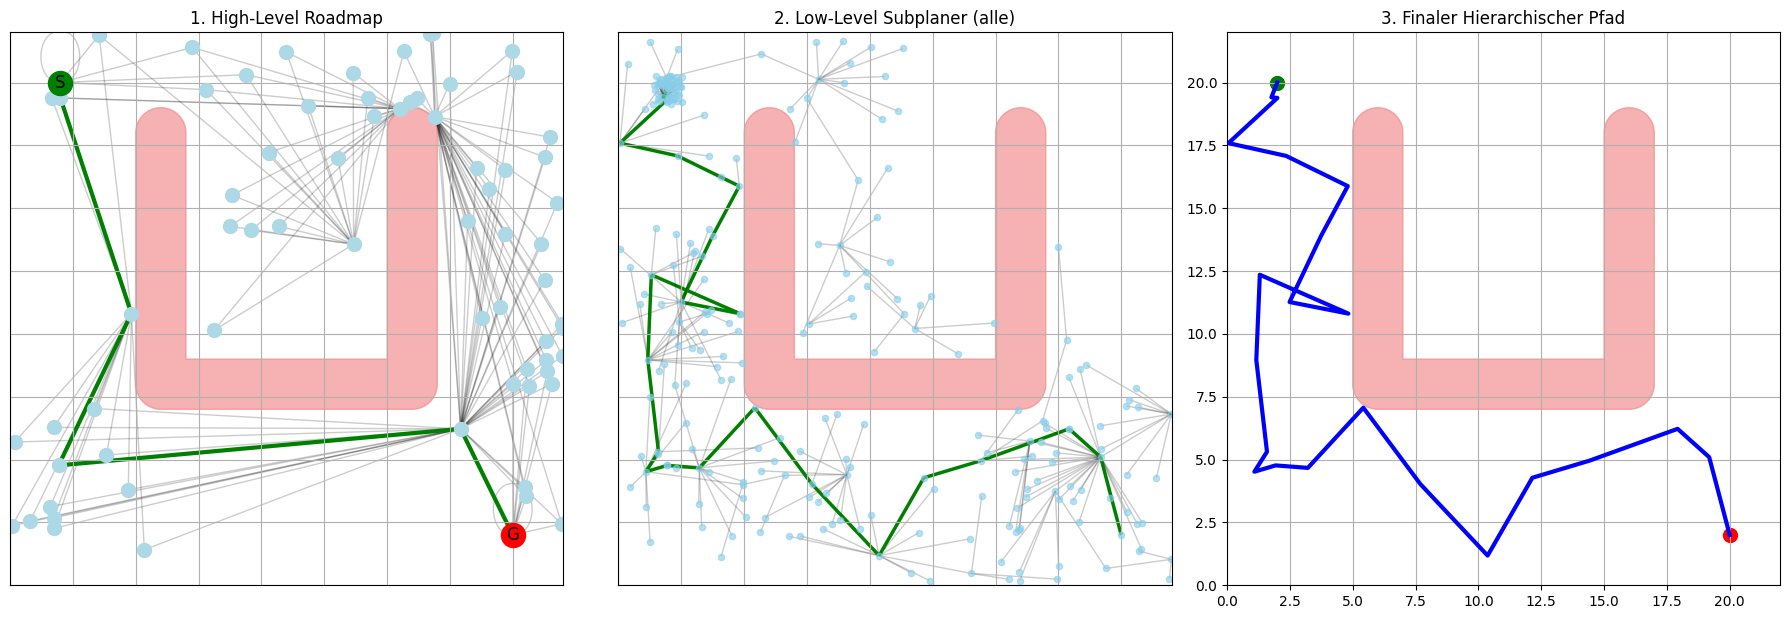


🔍 Szene: L-Shape
Globaler Pfad: ['start', 158, 1, 12, 0, 'goal']
Koordinaten des globalen Pfads: [[2.0, 2.0], array([1.04203804, 1.2503059 ]), array([ 1.32254423, 15.56379442]), array([ 1.01110821, 20.60552934]), array([18.16034849, 18.0258184 ]), [15.0, 15.0]]
Segment 0: [2.0, 2.0] → [1.04203804 1.2503059 ]
→ Lokaler Planner für Segment 0: [2.0, 2.0] → [1.04203804 1.2503059 ]
   Lokale Begrenzung (geclipped): ((np.float64(0.3045765174250328), np.float64(2.7374615200628005)), (np.float64(0.4087104507419661), np.float64(2.841595453379734)))
Segment 1: [1.04203804 1.2503059 ] → [ 1.32254423 15.56379442]
→ Lokaler Planner für Segment 1: [1.04203804 1.2503059 ] → [ 1.32254423 15.56379442]
   Lokale Begrenzung (geclipped): ((0, np.float64(9.182291131568107)), (np.float64(0.4070501615338742), np.float64(16.407050161533874)))
Segment 2: [ 1.32254423 15.56379442] → [ 1.01110821 20.60552934]
→ Lokaler Planner für Segment 2: [ 1.32254423 15.56379442] → [ 1.01110821 20.60552934]
   Lokale Begren

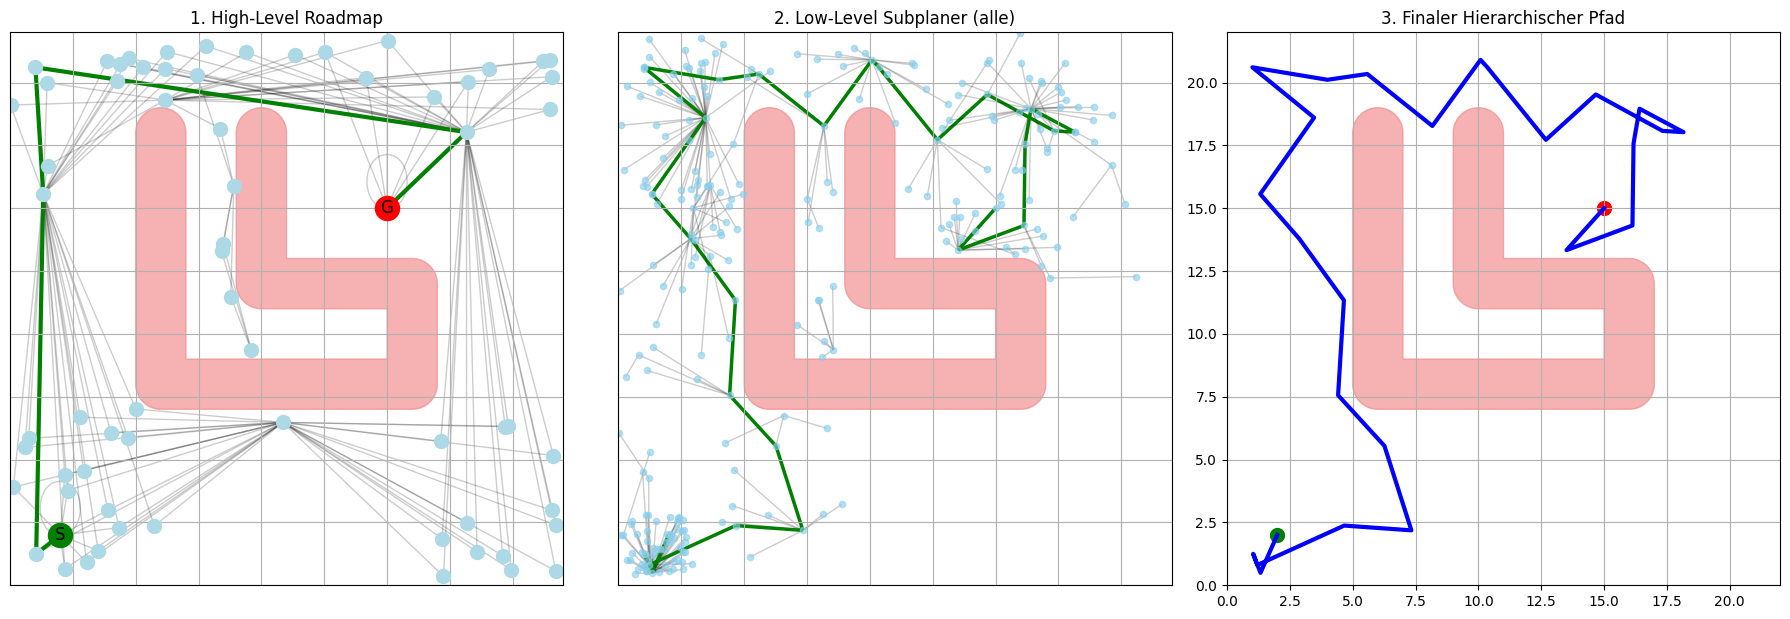


🔍 Szene: Cross-Shape
Globaler Pfad: ['start', 145, 0, 106, 1, 'goal']
Koordinaten des globalen Pfads: [[10, 10.0], array([ 9.81173902, 10.38339262]), array([3.00034153, 1.93726346]), array([ 5.34406048, 21.98524441]), array([ 9.65515016, 13.01192226]), [12.5, 15.0]]
Segment 0: [10, 10.0] → [ 9.81173902 10.38339262]
→ Lokaler Planner für Segment 0: [10, 10.0] → [ 9.81173902 10.38339262]
   Lokale Begrenzung (geclipped): ((np.float64(9.405869508991058), np.float64(10.405869508991058)), (np.float64(9.69169631237543), np.float64(10.69169631237543)))
Segment 1: [ 9.81173902 10.38339262] → [3.00034153 1.93726346]
→ Lokaler Planner für Segment 1: [ 9.81173902 10.38339262] → [3.00034153 1.93726346]
   Lokale Begrenzung (geclipped): ((0, np.float64(14.40604027644649)), (0, np.float64(14.160328040717946)))
Segment 2: [3.00034153 1.93726346] → [ 5.34406048 21.98524441]
→ Lokaler Planner für Segment 2: [3.00034153 1.93726346] → [ 5.34406048 21.98524441]
   Lokale Begrenzung (geclipped): ((0, np.f

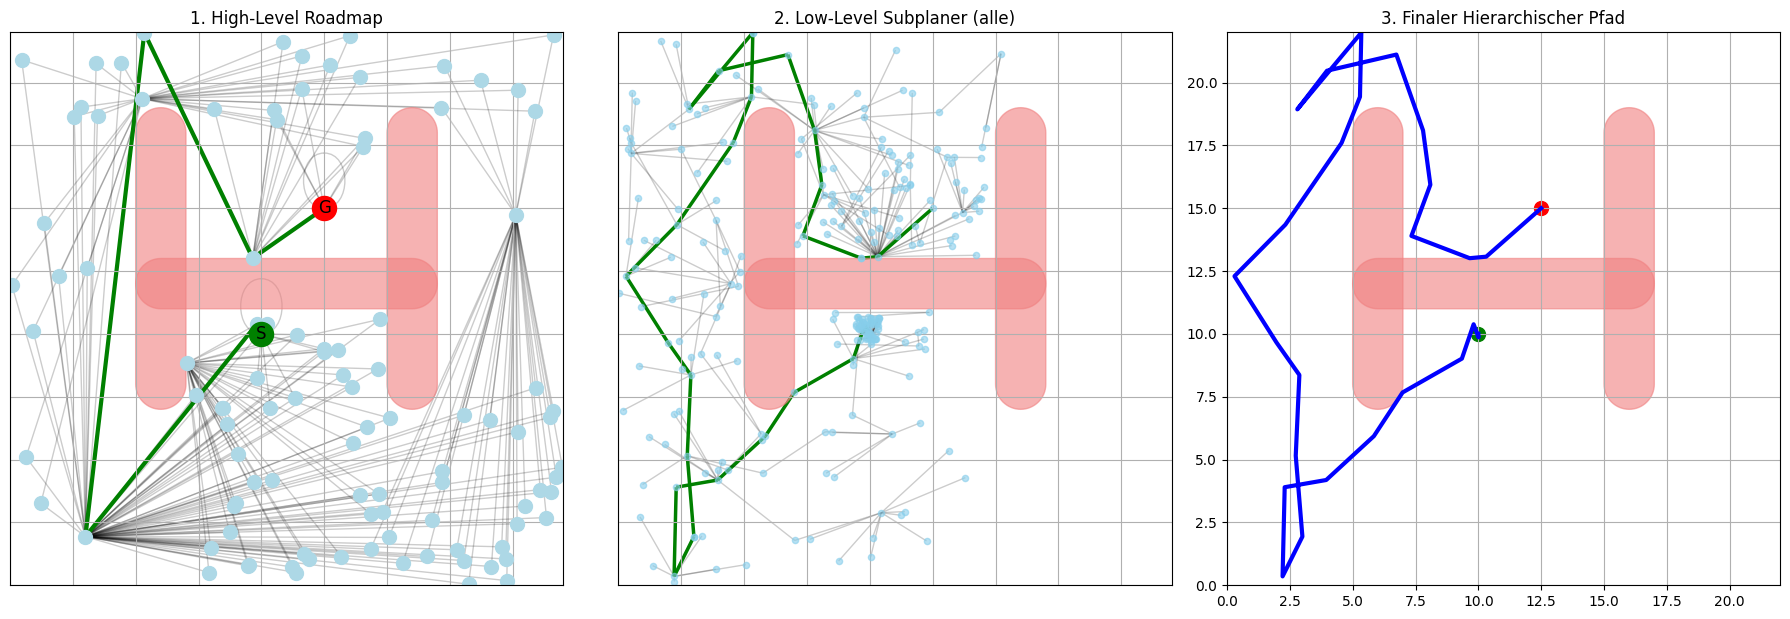


🔍 Szene: Corridor
Kein Pfad im Sichtbarkeitsgraph gefunden.
❌ Kein Pfad gefunden in Szene: Corridor

🔍 Szene: Complex Shape
Globaler Pfad: ['start', 104, 4, 21, 0, 75, 'goal']
Koordinaten des globalen Pfads: [[5.0, 5.0], array([4.55043796, 3.48166832]), array([ 4.46342834, 17.65959956]), array([ 5.01796835, 19.3259552 ]), array([15.55825008, 20.12545459]), array([18.5096061 ,  6.18535412]), [17.5, 5.0]]
Segment 0: [5.0, 5.0] → [4.55043796 3.48166832]
→ Lokaler Planner für Segment 0: [5.0, 5.0] → [4.55043796 3.48166832]
   Lokale Begrenzung (geclipped): ((np.float64(3.1917300735214855), np.float64(6.358707883822204)), (np.float64(2.6573452561594095), np.float64(5.824323066460128)))
Segment 1: [4.55043796 3.48166832] → [ 4.46342834 17.65959956]
→ Lokaler Planner für Segment 1: [4.55043796 3.48166832] → [ 4.46342834 17.65959956]
   Lokale Begrenzung (geclipped): ((0, np.float64(12.506933150373811)), (np.float64(2.570633943715036), np.float64(18.570633943715038)))
Segment 2: [ 4.46342834 

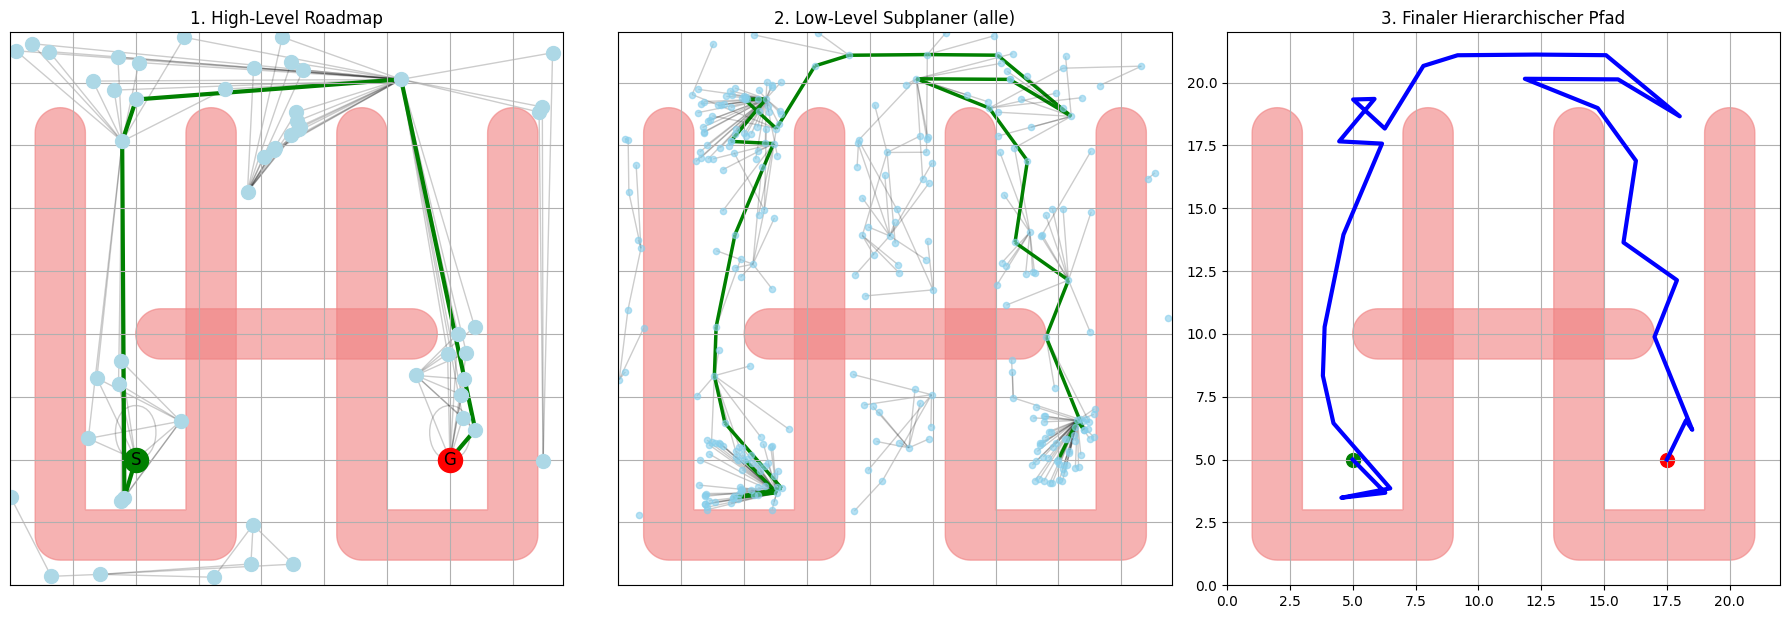


🔍 Szene: Multiple Obstacles
Globaler Pfad: ['start', 0, 81, 'goal']
Koordinaten des globalen Pfads: [[1.0, 1.0], array([11.03649379,  0.04305045]), array([11.78267588,  5.7093094 ]), [15.0, 5.0]]
Segment 0: [1.0, 1.0] → [11.03649379  0.04305045]
→ Lokaler Planner für Segment 0: [1.0, 1.0] → [11.03649379  0.04305045]
   Lokale Begrenzung (geclipped): ((0, np.float64(14.018246897239795)), (0, np.float64(8.521525226819103)))
Segment 1: [11.03649379  0.04305045] → [11.78267588  5.7093094 ]
→ Lokaler Planner für Segment 1: [11.03649379  0.04305045] → [11.78267588  5.7093094 ]
   Lokale Begrenzung (geclipped): ((np.float64(5.69440521250103), np.float64(17.12476445792261)), (0, np.float64(8.59135954837944)))
Segment 2: [11.78267588  5.7093094 ] → [15.0, 5.0]
→ Lokaler Planner für Segment 2: [11.78267588  5.7093094 ] → [15.0, 5.0]
   Lokale Begrenzung (geclipped): ((np.float64(10.096752328081667), np.float64(16.685923547862384)), (np.float64(2.060069088959188), np.float64(8.649240308739905)))

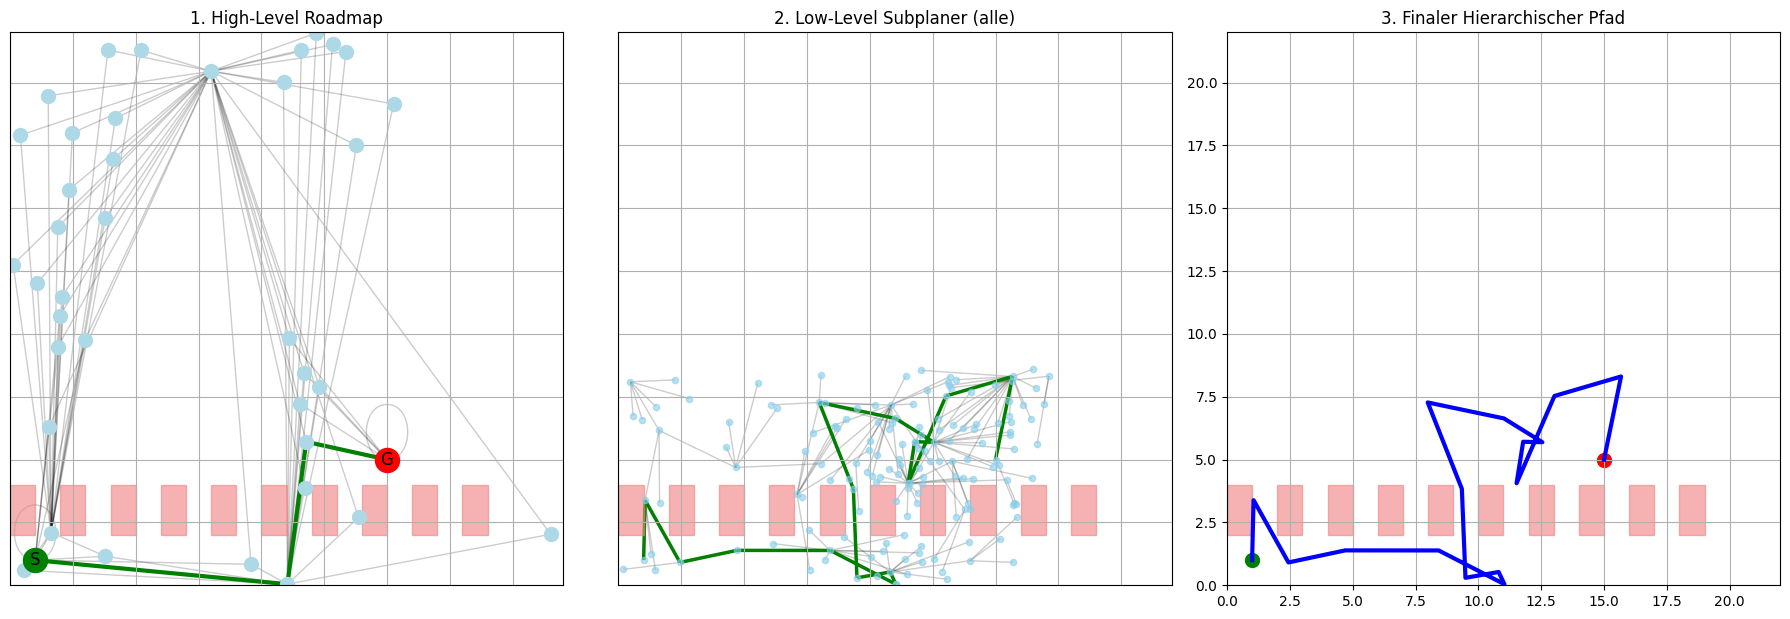


🔍 Szene: Random Obstacles
Globaler Pfad: ['start', 185, 0, 8, 'goal']
Koordinaten des globalen Pfads: [[1.0, 1.0], array([1.54843936, 2.16843941]), array([ 3.69838775, 17.02528477]), array([20.27646177, 21.1690258 ]), [19.0, 19.0]]
Segment 0: [1.0, 1.0] → [1.54843936 2.16843941]
→ Lokaler Planner für Segment 0: [1.0, 1.0] → [1.54843936 2.16843941]
   Lokale Begrenzung (geclipped): ((0, np.float64(2.5649700027742854)), (np.float64(0.29346938421958835), np.float64(2.874970030069999)))
Segment 1: [1.54843936 2.16843941] → [ 3.69838775 17.02528477]
→ Lokaler Planner für Segment 1: [1.54843936 2.16843941] → [ 3.69838775 17.02528477]
   Lokale Begrenzung (geclipped): ((0, np.float64(10.62341355669541)), (np.float64(1.5968620929716515), np.float64(17.59686209297165)))
Segment 2: [ 3.69838775 17.02528477] → [20.27646177 21.1690258 ]
→ Lokaler Planner für Segment 2: [ 3.69838775 17.02528477] → [20.27646177 21.1690258 ]
   Lokale Begrenzung (geclipped): ((np.float64(3.9874247620764667), np.floa

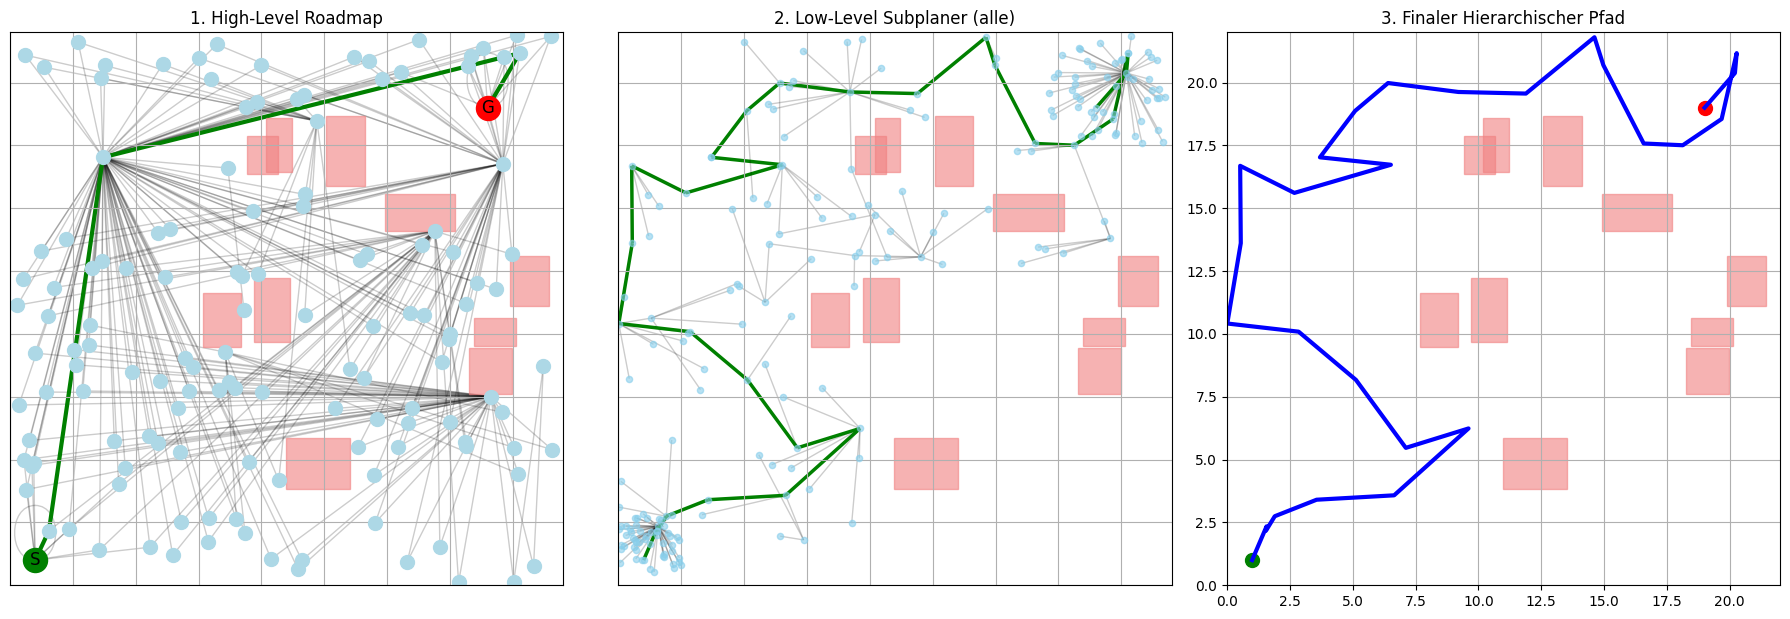

In [42]:
# ---- Alle Szenen durchlaufen + Benchmark ----
scenes = get_all_scenes()
results = []

for subplanner_type, config_low in [("Lazy", config_low_lazy), ("Basic", config_low_basic)]:
    print(f"\n🔁 Starte Benchmarks mit Subplanner: {subplanner_type}")

    for scene_name, (scene, limits, (start_pos, goal_pos)) in scenes:
        print(f"\n🔍 Szene: {scene_name}")
        start = [list(start_pos)]
        goal = [list(goal_pos)]

        collision_checker = CollisionChecker(scene, limits)

        SubPlanner = LazyPRM if subplanner_type == "Lazy" else BasicPRM
        hier_planner = HierarchicalPlanner(
            scene=scene,
            limits=limits,
            GlobalPlannerClass=VisibilityPRM,
            LocalPlannerClass=SubPlanner,
            config_global=config_high,
            config_local=config_low
        )

        t0 = time.time()
        path = hier_planner.plan_path(start, goal)
        t1 = time.time()

        coords = hier_planner.get_solution_path() if path else []
        euclidean_length = sum(euclidean(a, b) for a, b in zip(coords[:-1], coords[1:])) if coords else 0

        if not path:
            print(f"❌ Kein Pfad gefunden in Szene: {scene_name}")
            result = {
                "planner": f"Hierarchical-{subplanner_type}",
                "scene": scene_name,
                "hasPath": False,
                "length": 0,
                "euclidean_length": 0,
                "time": t1 - t0,
                "nodes": 0,
                "edges": 0,
                "roadmap_size": 0
            }
            results.append(result)
            continue

        print(f"✅ Pfad gefunden in Szene: {scene_name}, Länge: {len(path)}")

        hier_planner.solution_path = path
        hier_planner.graph = hier_planner.global_planner.graph
        visualize_hierarchical_planning(hier_planner, collision_checker, config_low)

        result = {
            "planner": f"Hierarchical-{subplanner_type}",
            "scene": scene_name,
            "hasPath": True,
            "length": len(path),
            "euclidean_length": euclidean_length,
            "time": t1 - t0,
            "nodes": len(hier_planner.graph.nodes),
            "edges": len(hier_planner.graph.edges),
            "roadmap_size": hier_planner.graph.size()
        }
        results.append(result)

In [43]:
# Ergebnisse als DataFrame
result_df = pd.DataFrame(results)
print("\n📊 Benchmark-Ergebnisse:")
print(result_df)



📊 Benchmark-Ergebnisse:
               planner               scene  hasPath  length  euclidean_length  \
0    Hierarchical-Lazy             U-Shape     True      15         37.798082   
1    Hierarchical-Lazy             L-Shape     True      22         35.294630   
2    Hierarchical-Lazy         Cross-Shape     True      20         49.757376   
3    Hierarchical-Lazy            Corridor    False       0          0.000000   
4    Hierarchical-Lazy       Complex Shape     True      29         61.219779   
5    Hierarchical-Lazy  Multiple Obstacles     True      15         39.031364   
6    Hierarchical-Lazy    Random Obstacles     True      15         35.574775   
7   Hierarchical-Basic             U-Shape     True      27         55.683075   
8   Hierarchical-Basic             L-Shape     True      31         65.247164   
9   Hierarchical-Basic         Cross-Shape     True      31         61.356910   
10  Hierarchical-Basic            Corridor    False       0          0.000000   
11 

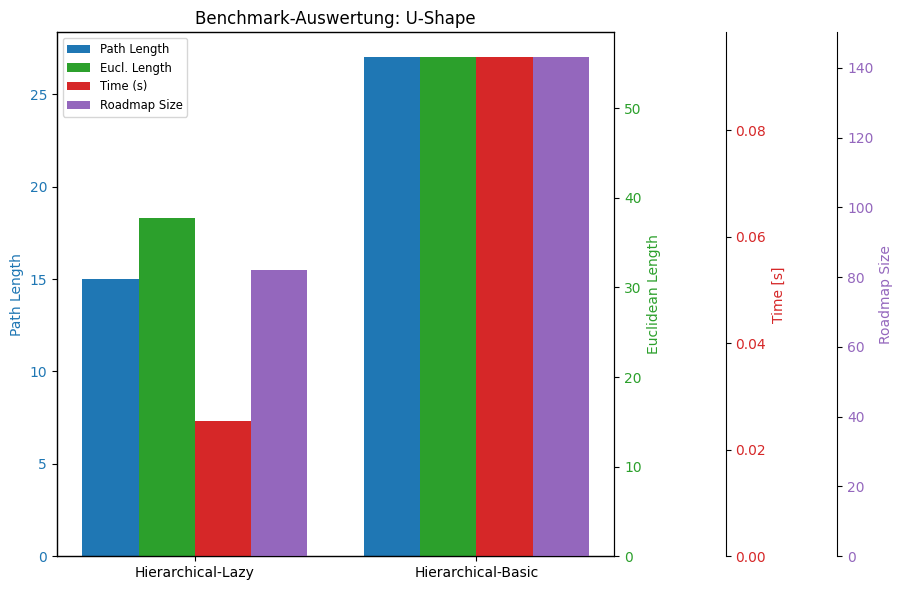

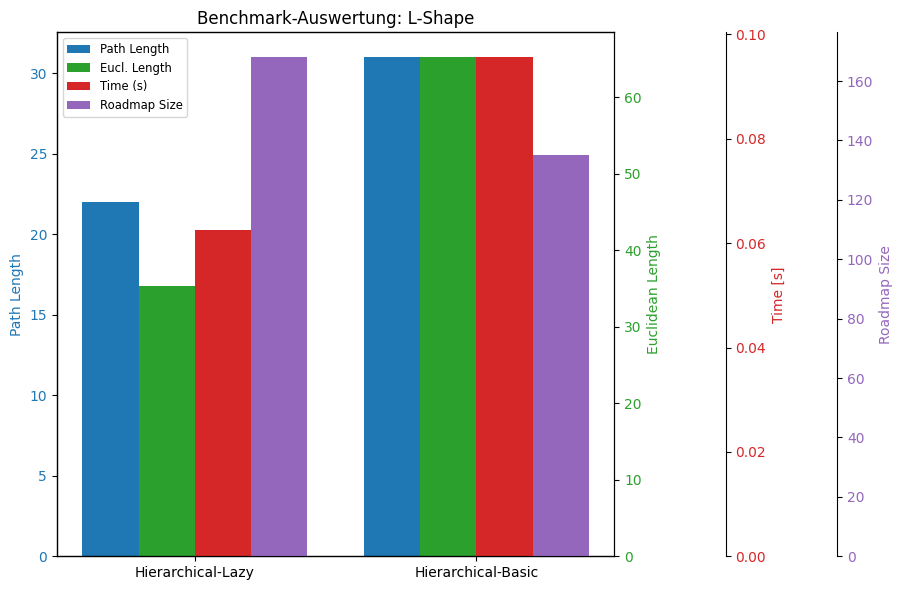

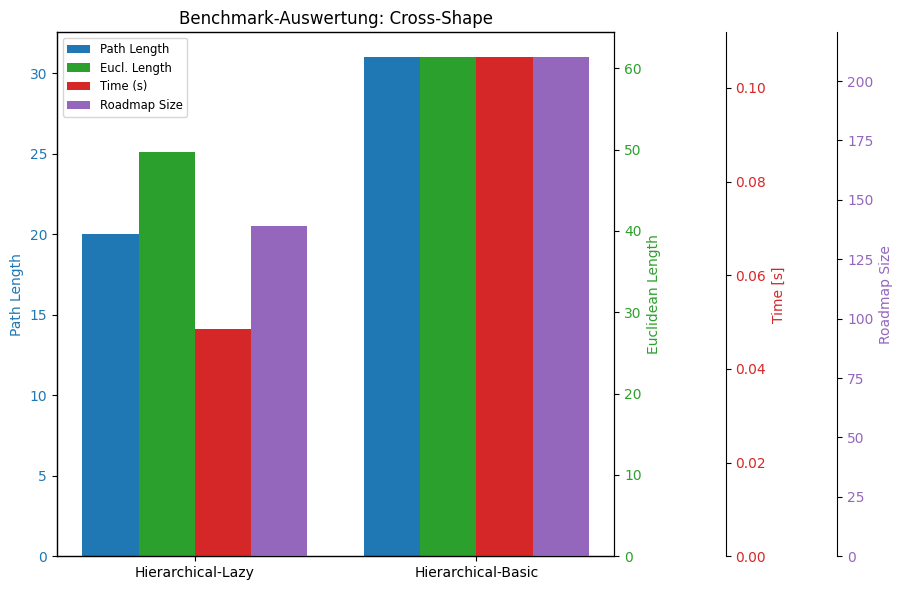

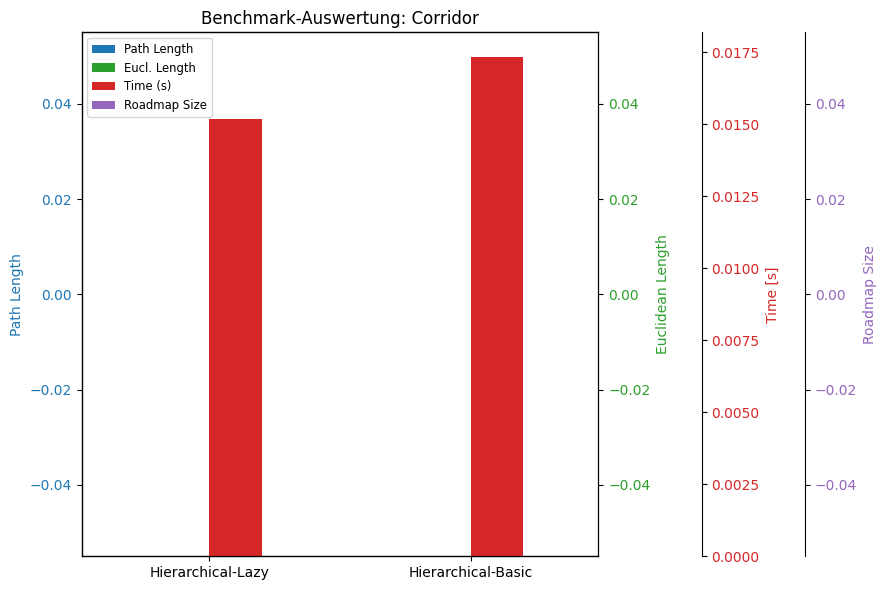

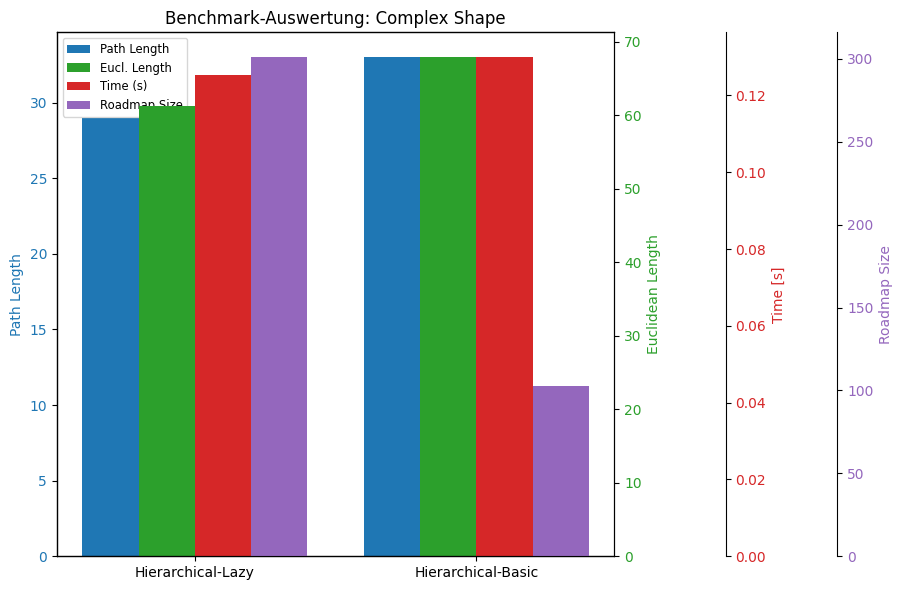

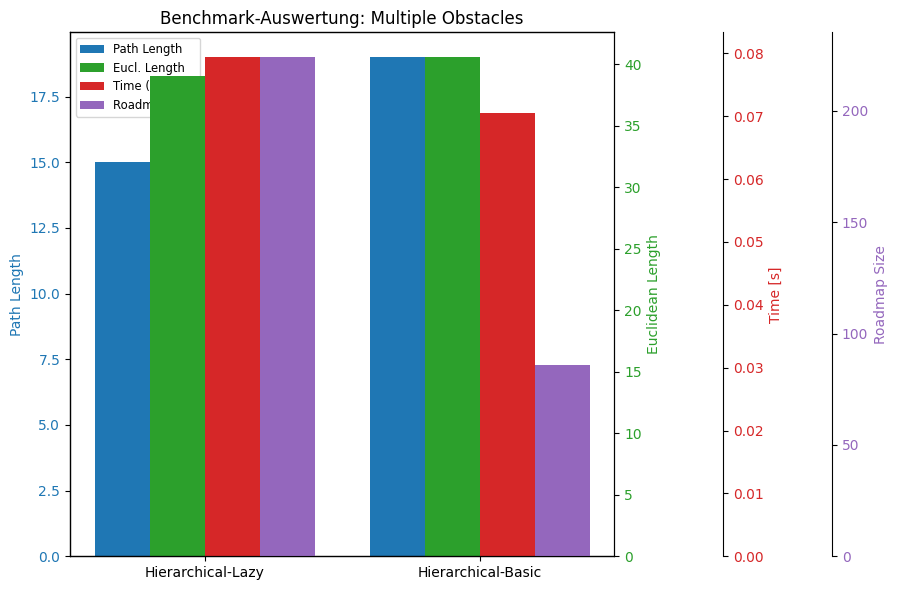

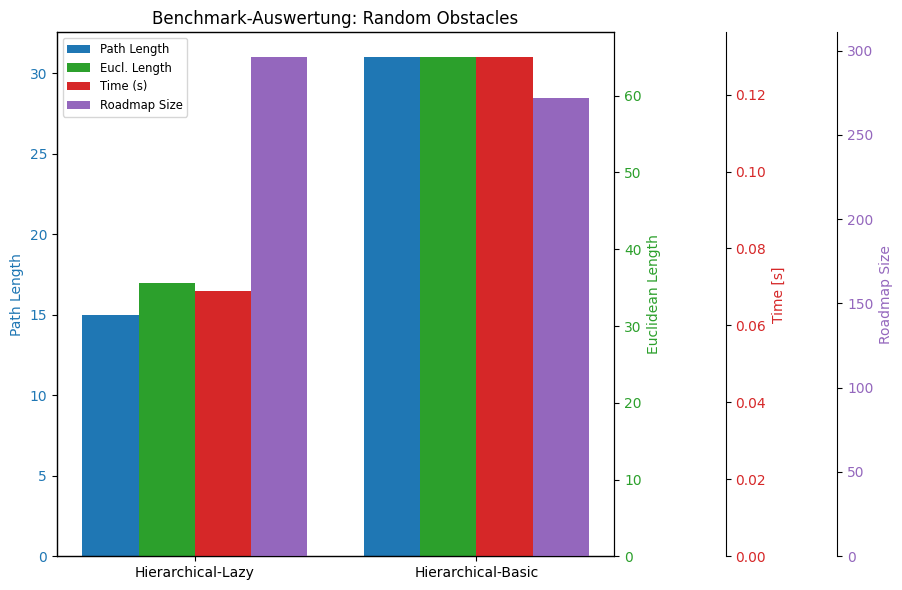

In [44]:
# Visualisierung
for scene in result_df["scene"].unique():
    df = result_df[result_df["scene"] == scene]
    fig, ax1 = plt.subplots(figsize=(10, 6))
    width = 0.2
    idx = np.arange(len(df))

    ax1.bar(idx, df["length"], width, label="Path Length", color="#1f77b4")
    ax1.set_ylabel("Path Length", color="#1f77b4")
    ax1.tick_params(axis='y', labelcolor="#1f77b4")

    ax2 = ax1.twinx()
    ax2.bar(idx + width, df["euclidean_length"], width, label="Eucl. Length", color="#2ca02c")
    ax2.set_ylabel("Euclidean Length", color="#2ca02c")
    ax2.tick_params(axis='y', labelcolor="#2ca02c")

    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('axes', 1.2))
    ax3.bar(idx + 2 * width, df["time"], width, label="Time (s)", color="#d62728")
    ax3.set_ylabel("Time [s]", color="#d62728")
    ax3.tick_params(axis='y', labelcolor="#d62728")

    ax4 = ax1.twinx()
    ax4.spines['right'].set_position(('axes', 1.4))
    ax4.bar(idx + 3 * width, df["roadmap_size"], width, label="Roadmap Size", color="#9467bd")
    ax4.set_ylabel("Roadmap Size", color="#9467bd")
    ax4.tick_params(axis='y', labelcolor="#9467bd")

    ax1.set_xticks(idx + 1.5 * width)
    ax1.set_xticklabels(df["planner"].values)
    ax1.set_title(f"Benchmark-Auswertung: {scene}")

    handles, labels = [], []
    for ax in [ax1, ax2, ax3, ax4]:
        h, l = ax.get_legend_handles_labels()
        handles.extend(h)
        labels.extend(l)
    ax1.legend(handles, labels, loc="upper left", fontsize="small")

    plt.tight_layout()
    plt.show()

Globaler Pfad: ['start', 201, 3, 6, 4, 80, 2, 153, 'goal']
Koordinaten des globalen Pfads: [[5, 5], array([5.63188658, 4.7800274 ]), array([ 3.05699411, 12.7012708 ]), array([ 5.22849567, 19.88648049]), array([ 8.72833297, 18.84411404]), array([16.75584002, 21.75897162]), array([17.35823301, 12.21286252]), array([17.79070437,  4.8175421 ]), [17.5, 5]]
Segment 0: [5, 5] → [5.63188658 4.7800274 ]
→ Lokaler Planner für Segment 0: [5, 5] → [5.63188658 4.7800274 ]
   Lokale Begrenzung (geclipped): ((np.float64(4.646862880792144), np.float64(5.985023700488776)), (np.float64(4.22093329186878), np.float64(5.559094111565413)))
Segment 1: [5.63188658 4.7800274 ] → [ 3.05699411 12.7012708 ]
→ Lokaler Planner für Segment 1: [5.63188658 4.7800274 ] → [ 3.05699411 12.7012708 ]
   Lokale Begrenzung (geclipped): ((0, np.float64(12.344440347274345)), (np.float64(0.740649103876974), np.float64(16.740649103876976)))
Segment 2: [ 3.05699411 12.7012708 ] → [ 5.22849567 19.88648049]
→ Lokaler Planner für Se

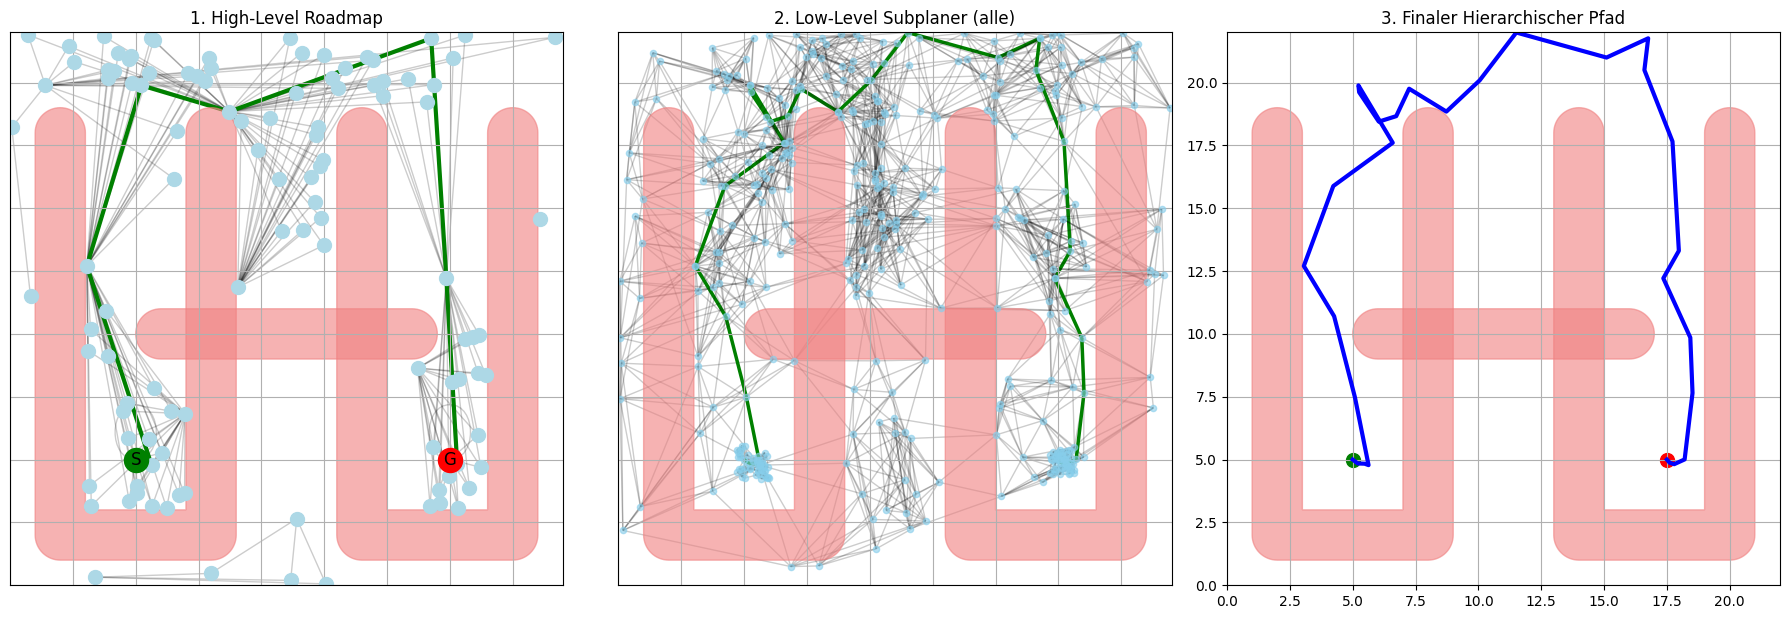

In [22]:
# --- Pfadplanung ---
path = hier_planner.plan_path(start, goal)
if not path:
    print("❌ Kein Pfad gefunden.")
else:
    print("✅ Pfad gefunden mit", len(path), "Punkten")

    # Korrekte Reihenfolge der Initialisierung für die Visualisierung
    hier_planner.solution_path = path  # Statt final_path
    hier_planner.graph = hier_planner.global_planner.graph  # Verwende direkt den globalen Planer-Graph

    collision_checker = CollisionChecker(hier_planner.scene, hier_planner.limits)
    visualize_hierarchical_planning(hier_planner, collision_checker, hier_planner.config_local)



🔄 Verarbeite Szene: U-Shape
Globaler Pfad: ['start', 11, 2, 'goal']
Koordinaten des globalen Pfads: [[2.0, 20.0], array([2.13119938, 8.20098192]), array([14.22782447,  0.45124292]), [20.0, 2.0]]
Segment 0: [2.0, 20.0] → [2.13119938 8.20098192]
→ Lokaler Planner für Segment 0: [2.0, 20.0] → [2.13119938 8.20098192]
   Lokale Begrenzung (geclipped): ((0, np.float64(10.065599690706243)), (np.float64(6.100490960617773), 22))
❌ Keine lokale Verbindung zwischen [2.0, 20.0] und [2.13119938 8.20098192].
❌ Kein Pfad gefunden in Szene: U-Shape

🔄 Verarbeite Szene: L-Shape
Globaler Pfad: ['start', 39, 0, 73, 'goal']
Koordinaten des globalen Pfads: [[2.0, 2.0], array([1.8334739, 1.2444059]), array([ 4.70867837, 19.94210816]), array([13.85384125, 18.84411224]), [15.0, 15.0]]
Segment 0: [2.0, 2.0] → [1.8334739 1.2444059]
→ Lokaler Planner für Segment 0: [2.0, 2.0] → [1.8334739 1.2444059]
   Lokale Begrenzung (geclipped): ((np.float64(1.14301000011466), np.float64(2.690463899003909)), (np.float64(0.8

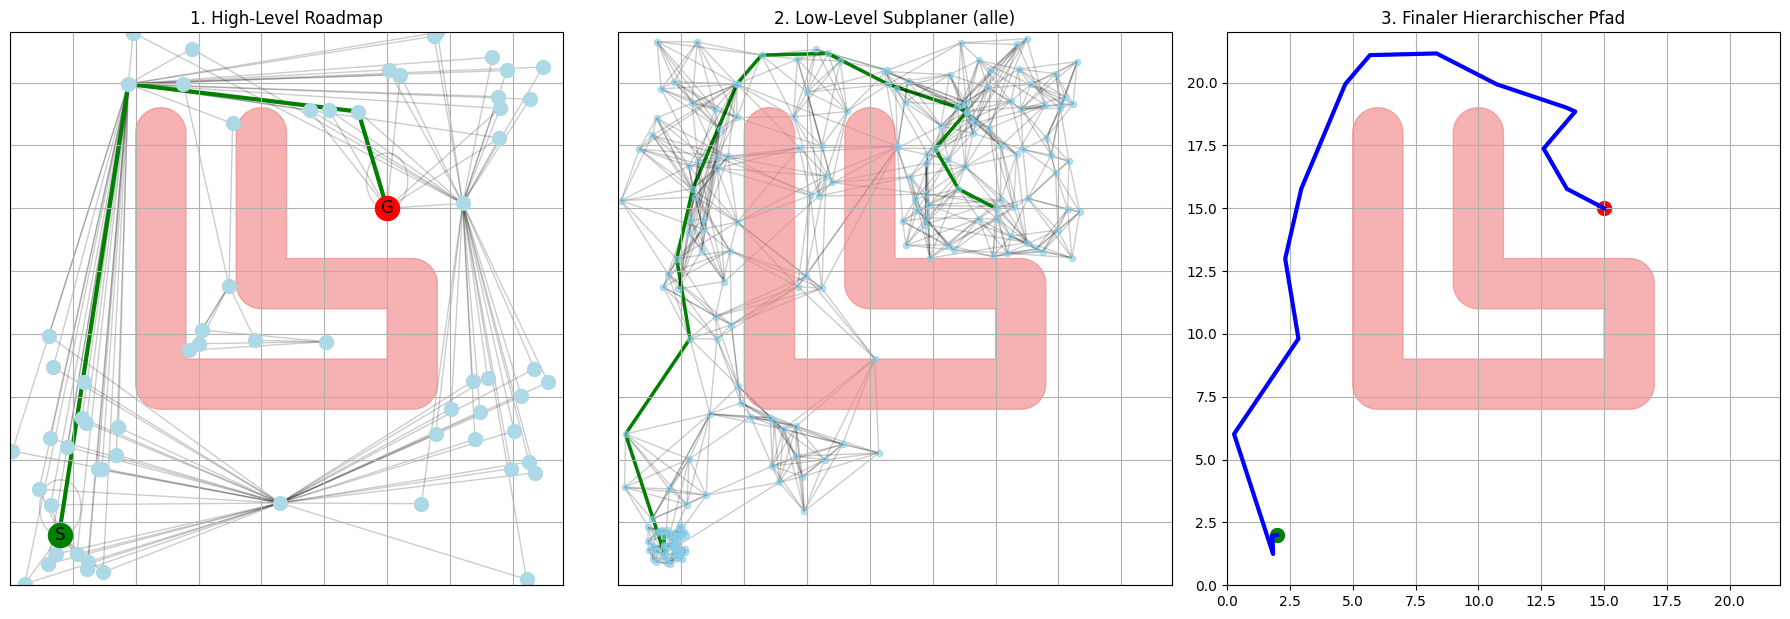


🔄 Verarbeite Szene: Cross-Shape
Globaler Pfad: ['start', 103, 0, 89, 'goal']
Koordinaten des globalen Pfads: [[10, 10.0], array([5.88429352, 4.99527935]), array([ 0.0915813 , 17.30583576]), array([ 7.85580116, 20.39366199]), [12.5, 15.0]]
Segment 0: [10, 10.0] → [5.88429352 4.99527935]
→ Lokaler Planner für Segment 0: [10, 10.0] → [5.88429352 4.99527935]
   Lokale Begrenzung (geclipped): ((np.float64(1.4624655498297265), np.float64(14.421827973254977)), (np.float64(1.0179584624500322), np.float64(13.977320885875283)))
Segment 1: [5.88429352 4.99527935] → [ 0.0915813  17.30583576]
→ Lokaler Planner für Segment 1: [5.88429352 4.99527935] → [ 0.0915813  17.30583576]
   Lokale Begrenzung (geclipped): ((0, np.float64(10.987937409811613)), (np.float64(3.1505575550441023), np.float64(19.150557555044102)))
Segment 2: [ 0.0915813  17.30583576] → [ 7.85580116 20.39366199]
→ Lokaler Planner für Segment 2: [ 0.0915813  17.30583576] → [ 7.85580116 20.39366199]
   Lokale Begrenzung (geclipped): ((0

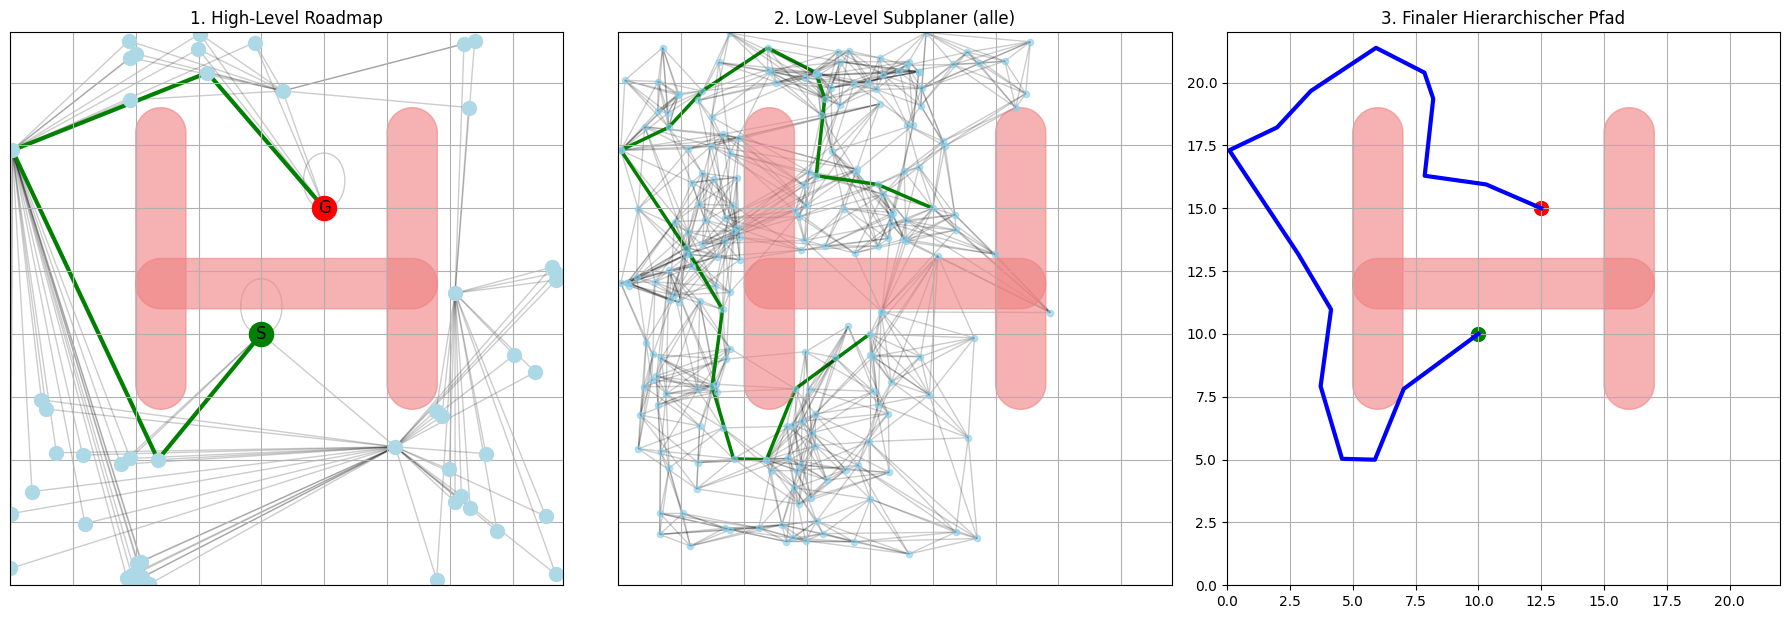


🔄 Verarbeite Szene: Corridor
Kein Pfad im Sichtbarkeitsgraph gefunden.
❌ Kein Pfad gefunden in Szene: Corridor

🔄 Verarbeite Szene: Complex Shape
Globaler Pfad: ['start', 106, 0, 16, 1, 21, 18, 83, 'goal']
Koordinaten des globalen Pfads: [[5.0, 5.0], array([4.33266762, 5.83845901]), array([ 3.76560394, 15.4149208 ]), array([ 3.49727912, 21.90941621]), array([ 0.02329104, 21.05733595]), array([15.3344958 , 19.76496816]), array([15.59642779, 16.29546357]), array([18.9336599,  6.9921466]), [17.5, 5.0]]
Segment 0: [5.0, 5.0] → [4.33266762 5.83845901]
→ Lokaler Planner für Segment 0: [5.0, 5.0] → [4.33266762 5.83845901]
   Lokale Begrenzung (geclipped): ((np.float64(3.594724724531379), np.float64(5.737942892129403)), (np.float64(4.347620423340978), np.float64(6.490838590939002)))
Segment 1: [4.33266762 5.83845901] → [ 3.76560394 15.4149208 ]
→ Lokaler Planner für Segment 1: [4.33266762 5.83845901] → [ 3.76560394 15.4149208 ]
   Lokale Begrenzung (geclipped): ((0, np.float64(12.049135777458

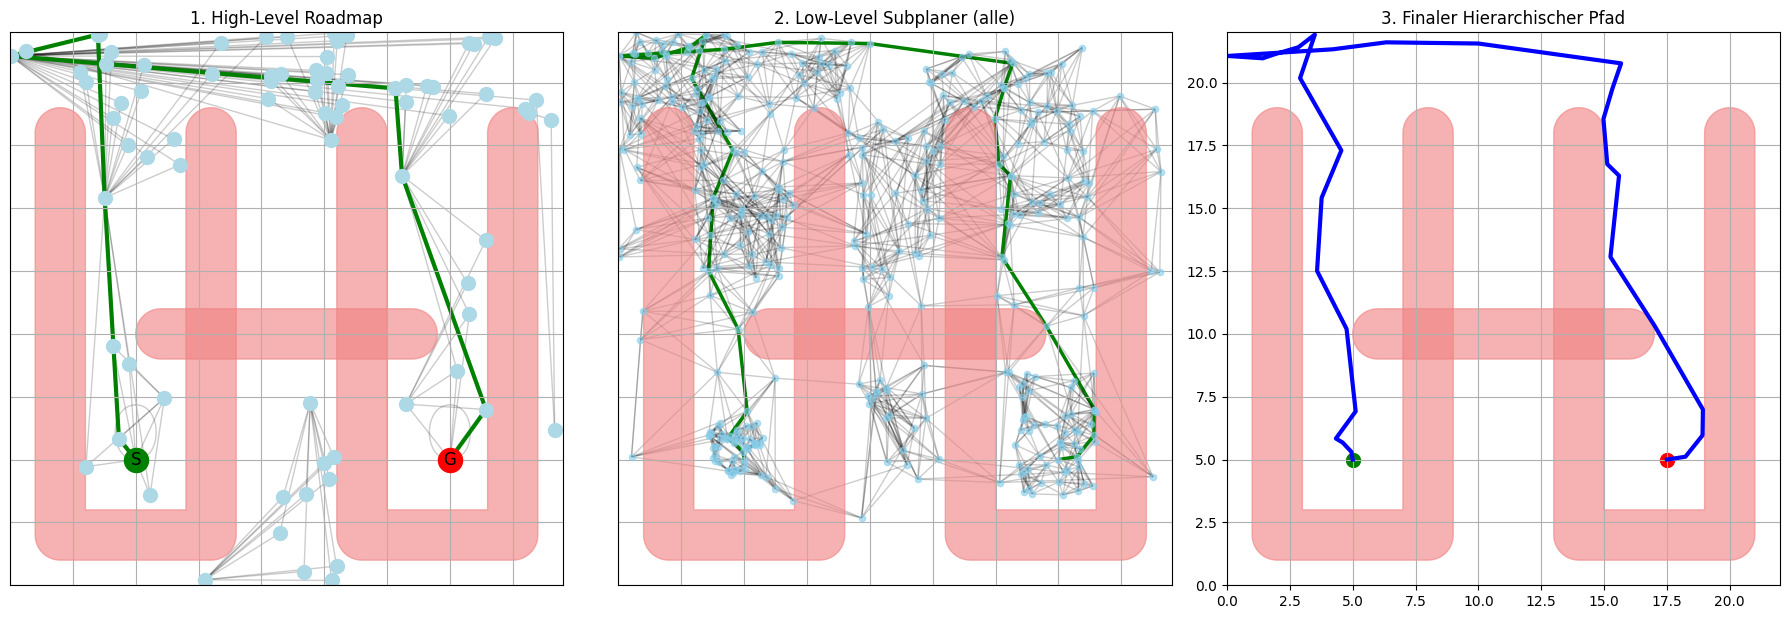


🔄 Verarbeite Szene: Multiple Obstacles
Globaler Pfad: ['start', 42, 0, 'goal']
Koordinaten des globalen Pfads: [[1.0, 1.0], array([1.9099073 , 7.82828434]), array([ 7.39066457, 13.51092208]), [15.0, 5.0]]
Segment 0: [1.0, 1.0] → [1.9099073  7.82828434]
→ Lokaler Planner für Segment 0: [1.0, 1.0] → [1.9099073  7.82828434]
   Lokale Begrenzung (geclipped): ((0, np.float64(8.343596355058283)), (0, np.float64(11.302784878267143)))
Segment 1: [1.9099073  7.82828434] → [ 7.39066457 13.51092208]
→ Lokaler Planner für Segment 1: [1.9099073  7.82828434] → [ 7.39066457 13.51092208]
   Lokale Begrenzung (geclipped): ((0, np.float64(12.545288909486278)), (np.float64(2.7746002355775916), np.float64(18.56460618577678)))
Segment 2: [ 7.39066457 13.51092208] → [15.0, 5.0]
→ Lokaler Planner für Segment 2: [ 7.39066457 13.51092208] → [15.0, 5.0]
   Lokale Begrenzung (geclipped): ((np.float64(3.1953322864473535), np.float64(19.195332286447353)), (np.float64(1.2554610395289938), np.float64(17.25546103952

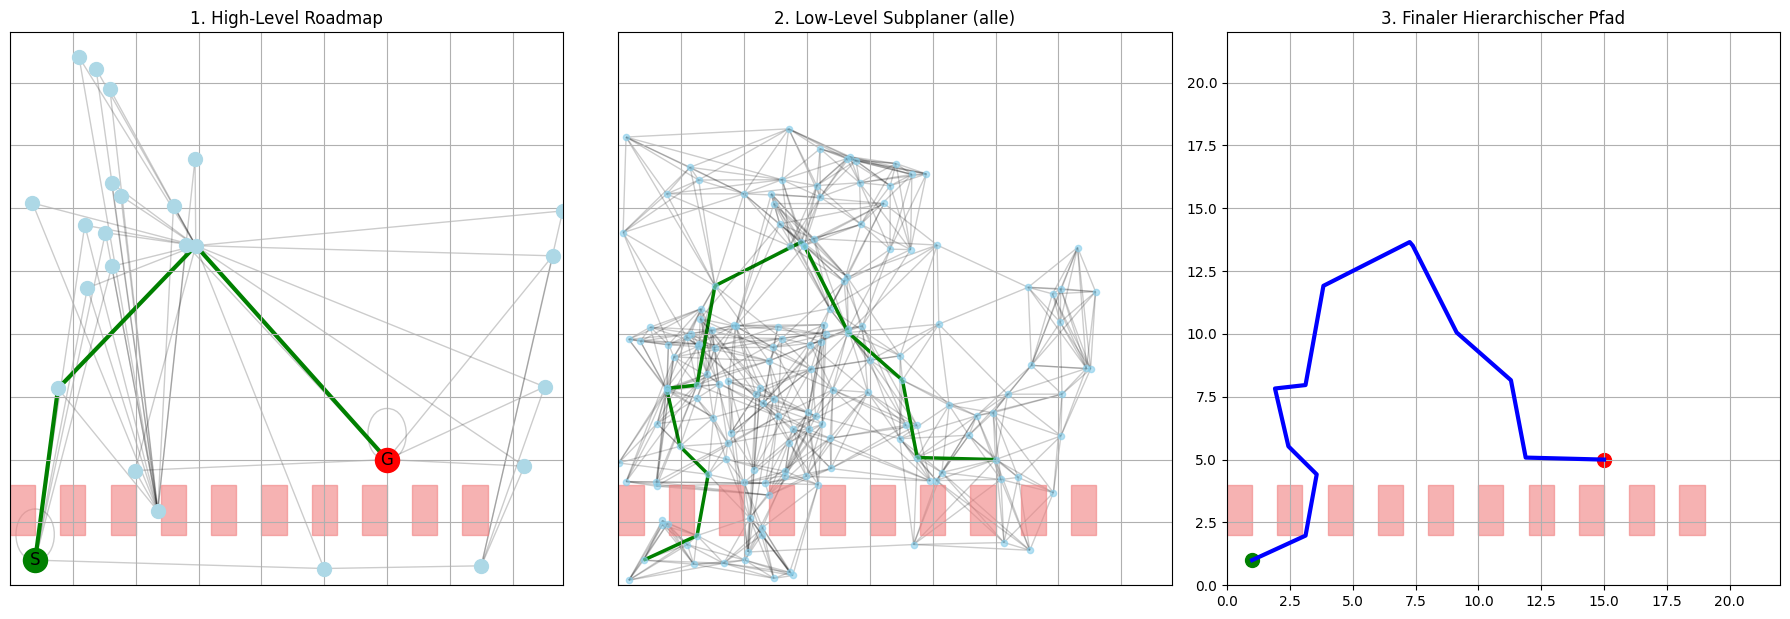


🔄 Verarbeite Szene: Random Obstacles
Globaler Pfad: ['start', 19, 3, 23, 'goal']
Koordinaten des globalen Pfads: [[1.0, 1.0], array([3.3892754 , 0.12265012]), array([16.35113845,  2.39930115]), array([15.84953894, 20.05089326]), [19.0, 19.0]]
Segment 0: [1.0, 1.0] → [3.3892754  0.12265012]
→ Lokaler Planner für Segment 0: [1.0, 1.0] → [3.3892754  0.12265012]
   Lokale Begrenzung (geclipped): ((0, np.float64(4.73990384880142)), (0, np.float64(3.1065912073603705)))
Segment 1: [3.3892754  0.12265012] → [16.35113845  2.39930115]
→ Lokaler Planner für Segment 1: [3.3892754  0.12265012] → [16.35113845  2.39930115]
   Lokale Begrenzung (geclipped): ((np.float64(1.8702069259759497), np.float64(17.87020692597595)), (0, np.float64(9.260975634075173)))
Segment 2: [16.35113845  2.39930115] → [15.84953894 20.05089326]
→ Lokaler Planner für Segment 2: [16.35113845  2.39930115] → [15.84953894 20.05089326]
   Lokale Begrenzung (geclipped): ((np.float64(8.1003386966761), 22), (np.float64(3.22509720327

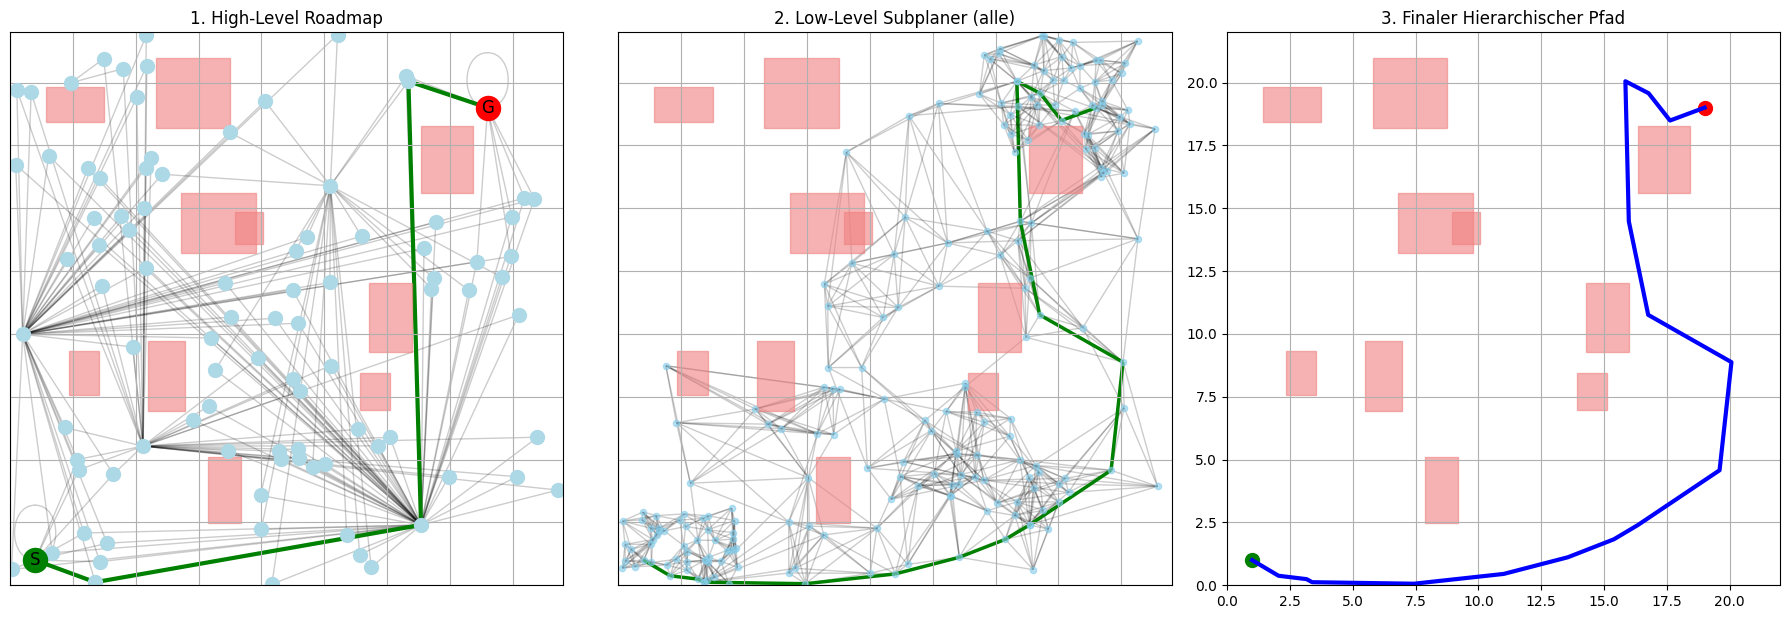

In [23]:
# --- Jede Szene durchlaufen ---
for name, (scene, limits, (start_tuple, goal_tuple)) in scenes:
    print(f"\n🔄 Verarbeite Szene: {name}")

    # Start- und Zielposition ins passende Format bringen
    start = [list(start_tuple)]
    goal = [list(goal_tuple)]

    # Kollisionserkennung
    collision_checker = CollisionChecker(scene, limits)

    # Planer initialisieren
    hier_planner = HierarchicalPlanner(
        scene=scene,
        limits=limits,
        GlobalPlannerClass=VisibilityPRM,
        LocalPlannerClass=LazyPRM,
        config_global=config_high,
        config_local=config_low
    )

    # Pfadplanung
    path = hier_planner.plan_path(start, goal)
    if not path:
        print(f"❌ Kein Pfad gefunden in Szene: {name}")
        continue
    else:
        print(f"✅ Pfad gefunden in Szene: {name}, Länge: {len(path)}")

    # Visualisierung vorbereiten (optional, kann deaktiviert werden)
    hier_planner.solution_path = path
    hier_planner.graph = hier_planner.global_planner.graph
    visualize_hierarchical_planning(hier_planner, collision_checker, config_low)

    # Alternativ: Ergebnisse speichern oder zusammenfassen